In [7]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [8]:
google = pd.read_csv('/content/drive/MyDrive/machine learning projects/training set/DJIA 30 Stock Time Series/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [9]:
humidity = pd.read_csv('/content/drive/MyDrive/machine learning projects/training set/Historical Hourly Weather Data 2012-2017/humidity.csv', index_col='datetime', parse_dates=['datetime'])
humidity.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,18.0,...,27.0,NaN,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,12.0,...,29.0,NaN,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,15.0,...,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,28.0,...,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,76.0,NaN,75.0,56.0,72.0,17.0,23.0,34.0,31.0,...,32.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
humidity.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,87.0,81.0,22.0,93.0,24.0,72.0,18.0,68.0,37.0,18.0,...,27.0,58.0,64.0,37.0,57.0,60.0,100.0,96.0,96.0,60.0
2017-11-29 21:00:00,87.0,71.0,22.0,87.0,21.0,72.0,18.0,73.0,34.0,12.0,...,29.0,58.0,59.0,74.0,57.0,60.0,100.0,96.0,96.0,60.0
2017-11-29 22:00:00,87.0,71.0,22.0,93.0,23.0,68.0,17.0,60.0,32.0,15.0,...,31.0,58.0,66.0,74.0,57.0,60.0,100.0,96.0,96.0,60.0
2017-11-29 23:00:00,87.0,71.0,22.0,87.0,14.0,63.0,17.0,33.0,30.0,28.0,...,26.0,58.0,58.0,56.0,57.0,60.0,100.0,96.0,96.0,60.0
2017-11-30 00:00:00,87.0,76.0,22.0,75.0,56.0,72.0,17.0,23.0,34.0,31.0,...,32.0,58.0,58.0,56.0,57.0,60.0,100.0,96.0,96.0,60.0


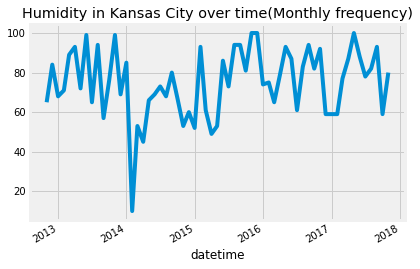

In [12]:
humidity["Kansas City"].asfreq('M').plot() # asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
plt.title('Humidity in Kansas City over time(Monthly frequency)')
plt.show()

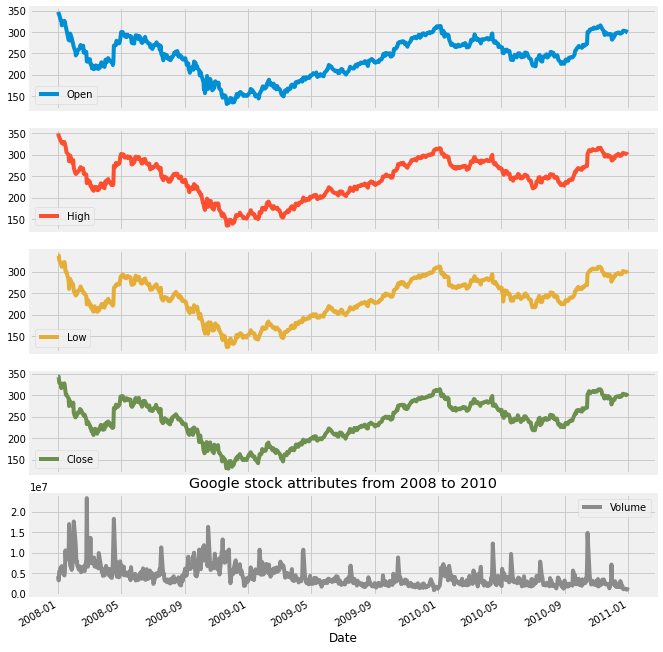

In [13]:
google['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.savefig('stocks.png')
plt.show()